### 서울시 구별 cctv현황 분석하기
- 서울시 각 구별 cctv수 파악
- 인구대비 cctv비울을 파악해서 순위매기기
- 인구대비 cctv의 예측지를 확인하고, cctv가 부족한 구 확인

In [2]:
#numpy : 고성능 과학계산을 위한 라이브러리, 다차원 데이터 다루기 용이
#pandas : 데이터를 표 형식으로 보여줌 1,2차원 데이터
#matplotlib : 데이터 시각화

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. CSV파일 읽어오기 - 서울시 구별 cctv 현황

In [5]:
# 코드에서 파일을 다루는 함수, 기능사용시 기본적으로 현재 실행되고 있는
# 코드파일과 같은 위치에 있는 파일을 찾으려고 하는데
# 같은 위치에 CCTV_inSeoul.csv 파일이 없네요

cctv_seoul = pd.read_csv('CCTV_in_Seoul.csv',
                        encoding = 'utf-8')
#상위의 데이터 불러오기
#기본값으모 5개 불러옴  head()라고쓰면
#데이터를 잘 불러왔는지 확인(엄청양이 많을 때)
cctv_seoul.head()


,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


## 2.엑셀(xls)파일 읽기 - 서울시 인구 현황

In [7]:
#read_excel사용해서 population_in_Seoul 파일 읽어오기
#인코딩3가지 방법
#utf-8
#euc-kr
#cp949

In [8]:
pop_seoul = pd.read_excel('population_in_Seoul.xls')
pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


## 3.데이터 전처리

In [10]:
#cctv데이터 컬럼명 수정
#기관명 > 구별
#rename({바꿀 값 : 바뀔 값}) : 컬럼명 변경

In [11]:
cctv_seoul = cctv_seoul.rename(columns={cctv_seoul.columns[0]:"구별"})
cctv_seoul
#inplace = True도 값을 수정하는 방법(츨력은 안하고 저장만됨)
#cctv_seoul.rename(columns={cctv_seoul.columns[0]:"구별"}, inplace = True)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


In [12]:
#population 데이터 수정
#받아올 범위 지정하기
#header : 시작할 (행)row 선택
#usecols : 가져올 column 선택
pop_seoul = pd.read_excel('population_in_Seoul.xls',
                         header = 2,
                         usecols ='B, D, G, J, N')
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [13]:
#population 컬럼명 바꾸기
#자치구 > 구별
#계 > 인구수
#계.1 > 한국인
#계.2 > 외국인
#65세이상 고령자 > 고령자
#{'자치구':'구별','계':'인구수'} 이런식으로 한번에

In [14]:
pop_seoul.rename(columns={pop_seoul.columns[0]:"구별"
                          ,pop_seoul.columns[1]:"인구수",
                          pop_seoul.columns[2]:"한국인",
                          pop_seoul.columns[3]:"외국인",
                          pop_seoul.columns[4]:"고령자"}
                          , inplace = True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [15]:
pop_seoul

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0


## cctv가 가장 적은 구와 가장 많은 구를 확인

In [17]:
#cctv 가장 적은 구 확인
#컬럼안에 값을 기준으로 정렬
#by 속성에 기준이 되는 컬럼 입력
# 기본 정렬값은 오름차순
cctv_seoul.sort_values(by = '소계')

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348
5,광진구,707,573,78,53,174
2,강북구,748,369,120,138,204
1,강동구,773,379,99,155,377
3,강서구,884,388,258,184,81
19,영등포구,904,495,214,195,373


In [18]:
#cctv 가장 만은 구 확인
#정렬을 내림차순으로 바꾼다.
# > ascending = False 속성 추가
cctv_seoul.sort_values(by = '소계', ascending = False)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398
6,구로구,1561,1142,173,246,323
4,관악구,1496,846,260,390,613
16,성북구,1464,1009,78,360,204
10,동대문구,1294,1070,23,198,579
8,노원구,1265,542,57,451,516


### 최군 3년동안 cctv가 많이 설치된 지역을 알아보자

In [20]:
#'최근 3년 생성 갯수'
#컬럼값 2014 + 2015 + 2016

In [21]:
# 만드는 코드
cctv_seoul['최근 3년 생성 갯수'] = cctv_seoul['2014년'] + cctv_seoul['2015년'] + cctv_seoul['2016년']

In [22]:
# 출력하는 코드
cctv_seoul

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 3년 생성 갯수
0,강남구,2780,1292,430,584,932,1946
1,강동구,773,379,99,155,377,631
2,강북구,748,369,120,138,204,462
3,강서구,884,388,258,184,81,523
4,관악구,1496,846,260,390,613,1263
5,광진구,707,573,78,53,174,305
6,구로구,1561,1142,173,246,323,742
7,금천구,1015,674,51,269,354,674
8,노원구,1265,542,57,451,516,1024
9,도봉구,485,238,159,42,386,587


### 최근 3년동안 cctv증가율
- 1. '최근 3년 증가율' 컬럼 생성
- 2. 최근 3년 cctv 증가 갯수/2013년 이전 cctv 갯수
- 3. 어떤 구에서 가장 많은 비율의 cctv가 증가했는지 알아보기

In [24]:
cctv_seoul['최근 3년 증가율'] = cctv_seoul['최근 3년 생성 갯수']/cctv_seoul['2013년도 이전']

In [25]:
cctv_seoul

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 3년 생성 갯수,최근 3년 증가율
0,강남구,2780,1292,430,584,932,1946,1.506192
1,강동구,773,379,99,155,377,631,1.664908
2,강북구,748,369,120,138,204,462,1.252033
3,강서구,884,388,258,184,81,523,1.347938
4,관악구,1496,846,260,390,613,1263,1.492908
5,광진구,707,573,78,53,174,305,0.532286
6,구로구,1561,1142,173,246,323,742,0.649737
7,금천구,1015,674,51,269,354,674,1.000000
8,노원구,1265,542,57,451,516,1024,1.889299
9,도봉구,485,238,159,42,386,587,2.466387


In [26]:
cctv_seoul.sort_values(by = '최근 3년 증가율', ascending = False)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 3년 생성 갯수,최근 3년 증가율
22,종로구,1002,464,314,211,630,1155,2.489224
9,도봉구,485,238,159,42,386,587,2.466387
12,마포구,574,314,118,169,379,666,2.121019
8,노원구,1265,542,57,451,516,1024,1.889299
1,강동구,773,379,99,155,377,631,1.664908
19,영등포구,904,495,214,195,373,782,1.579798
0,강남구,2780,1292,430,584,932,1946,1.506192
4,관악구,1496,846,260,390,613,1263,1.492908
23,중구,671,413,190,72,348,610,1.476998
11,동작구,1091,544,341,103,314,758,1.393382


### 서울시 인구 데이터 파악

In [28]:
#행, 열의 갯수 출력
pop_seoul.shape

(27, 5)

In [29]:
cctv_seoul.shape

(25, 8)

In [30]:
cctv_seoul.columns

Index(['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년', '최근 3년 생성 갯수',
       '최근 3년 증가율'],
      dtype='object')

In [31]:
pop_seoul.columns

Index(['구별', '인구수', '한국인', '외국인', '고령자'], dtype='object')

In [32]:
cctv_seoul['구별'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [33]:
pop_seoul['구별'].unique()

array(['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [34]:
#집합 자료형
#-순서가 없음
#-중복을 허용하지 않는다
set(pop_seoul['구별']) - set(pop_seoul['구별'])

set()

In [35]:
###pop_seoul ['구별']에서 nan 값과 합계 값이 있는 행 삭제

In [36]:
#Boolean 인덱싱을 통해서 '구별' 컬럼에 합계 값이 있는 행출력
pop_seoul[pop_seoul['구별']=='합계']

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0


In [37]:
# == : 같냐?
# 같으면 True
# 다르면 False
pop_seoul['구별'] =='합계'

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
Name: 구별, dtype: bool

In [38]:
#인덱싱에 Boolean값을 사용하면
#True값은 출력하고
#False값은 출력하지 않는다
pop_seoul[pop_seoul['구별'] == '합계'].index

Int64Index([0], dtype='int64')

In [39]:
#drop합수
#drop(행 번호)
pop_seoul.drop([0], inplace = True)

In [40]:
#결측지 제거
#isnull()
#결측지 : True
#결측지가 아닌값 : False
pop_seoul['구별'].isnull()

1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
Name: 구별, dtype: bool

In [41]:
del_index = pop_seoul[pop_seoul['구별'].isnull()].index

In [42]:
pop_seoul.drop(del_index,inplace = True)

### 구별 컬럼을 기준으로 데이터 합치기
- 데이터 프레임을 합치는 함수
- concat : 행, 열을 기준으로 데이터를 합침
- merge : 행, 열 속의 값을 데이터 프레임을 합침

In [45]:
data_merge = pd.merge(cctv_seoul, pop_seoul, on = '구별')

In [46]:
data_merge

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 3년 생성 갯수,최근 3년 증가율,인구수,한국인,외국인,고령자
0,강남구,2780,1292,430,584,932,1946,1.506192,570500.0,565550.0,4950.0,63167.0
1,강동구,773,379,99,155,377,631,1.664908,453233.0,449019.0,4214.0,54622.0
2,강북구,748,369,120,138,204,462,1.252033,330192.0,326686.0,3506.0,54813.0
3,강서구,884,388,258,184,81,523,1.347938,603772.0,597248.0,6524.0,72548.0
4,관악구,1496,846,260,390,613,1263,1.492908,525515.0,507203.0,18312.0,68082.0
5,광진구,707,573,78,53,174,305,0.532286,372164.0,357211.0,14953.0,42214.0
6,구로구,1561,1142,173,246,323,742,0.649737,447874.0,416487.0,31387.0,56833.0
7,금천구,1015,674,51,269,354,674,1.000000,255082.0,236353.0,18729.0,32970.0
8,노원구,1265,542,57,451,516,1024,1.889299,569384.0,565565.0,3819.0,71941.0
9,도봉구,485,238,159,42,386,587,2.466387,348646.0,346629.0,2017.0,51312.0


In [47]:
#구별 컬럼에서 원하는 값이 있는 행(가로) 삭제하기
#pop_seoul['구별'] == '합계'
##pop_seoul에 구별컬럼의 값을 비교
#'합계'라는 값가 비교(==)
#구별 컬럼에 합계 값은 True
#구별 컬럼에 합계가 아닌 값은 false
#Boolean값으로 변환

##불리언 값을 인덱싱에 활용 > 불리언인덱싱
#인덱싱하는 값으로 불리언 값을활용
#True 값 출럭
#False 값 출력하지 않음

##pop_seoul[pop_seoul['구별'] == '합계']
#'구별' 컬럼에 값이 '합계'인 행의 인덱스 번호 출력

##drop함수 안에 속성값으로 index번호를 적어야함
#drop함수 사용해서 [0]번 인덱스를 가진 행 삭제
#'구별'컬럼에 값이 '합계'인 행

#pop_seoul.drop(pop_seoul[pop_seoul['구별']=='합계'].index, inplace = True)

### 4.인구대비 cctv비율
- '인구대비 cctv 비율' 컬럼 생성
- data_merge에서 소계 / 인구수 값 대입
- '인구대비 cctv 비율' 순위매기기

In [49]:
data_merge['인구대비 CCTV 비율'] = data_merge['소계'] / data_merge['인구수'] * 100

In [50]:
data_merge.sort_values(by = '인구대비 CCTV 비율', ascending = False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 3년 생성 갯수,최근 3년 증가율,인구수,한국인,외국인,고령자,인구대비 CCTV 비율
20,용산구,1624,1368,218,112,398,728,0.532164,244203.0,229456.0,14747.0,36231.0,0.665020
22,종로구,1002,464,314,211,630,1155,2.489224,162820.0,153589.0,9231.0,25425.0,0.615404
23,중구,671,413,190,72,348,610,1.476998,133240.0,124312.0,8928.0,20764.0,0.503603
0,강남구,2780,1292,430,584,932,1946,1.506192,570500.0,565550.0,4950.0,63167.0,0.487292
14,서초구,1930,1406,157,336,398,891,0.633713,450310.0,445994.0,4316.0,51733.0,0.428594


### 인구대비 cctv의 예측지를 확인하고, cctv가 부족한 구 확인

In [53]:
#구별 컬럼을 인덱스로 만들기
#set_index('인덱스로 만들 컬럼 이름')
data_merge.set_index('구별', inplace = True)

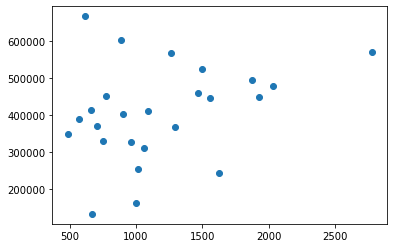

In [54]:
#인구수 대비 CCTV 수 시각화
#왼쪽 위 인구수 대비 CCTV가 적다
#오른쪽 아래 인구수 대비 CCTV가 많다
#X축 CCTV수/ Y축 인구수
plt.scatter(data_merge['소계'], data_merge['인구수'])
plt.show()

In [55]:
from matplotlib import rc
rc('font',family='Malgun Gothic')

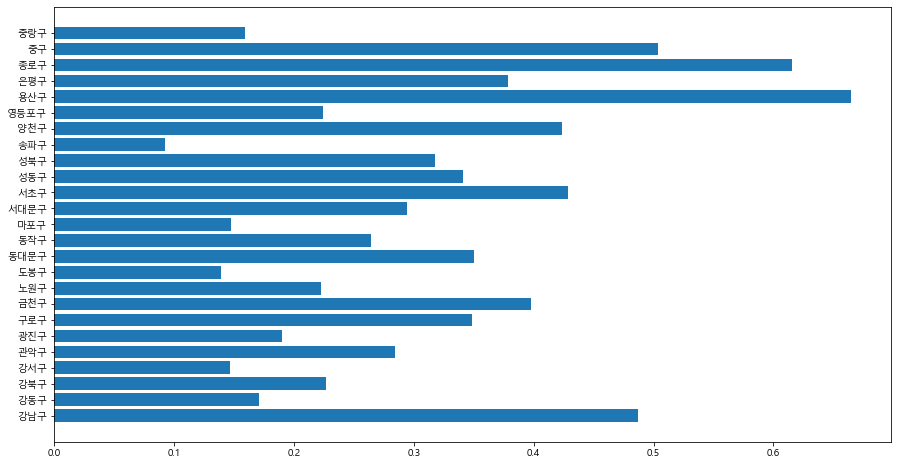

In [56]:
plt.figure(figsize = (15,8))
plt.barh(data_merge.index,data_merge['인구대비 CCTV 비율'])
plt.show()

In [59]:
data_merge.sort_values(by = '인구대비 CCTV 비율',
                       ascending = False,
                       inplace = True)

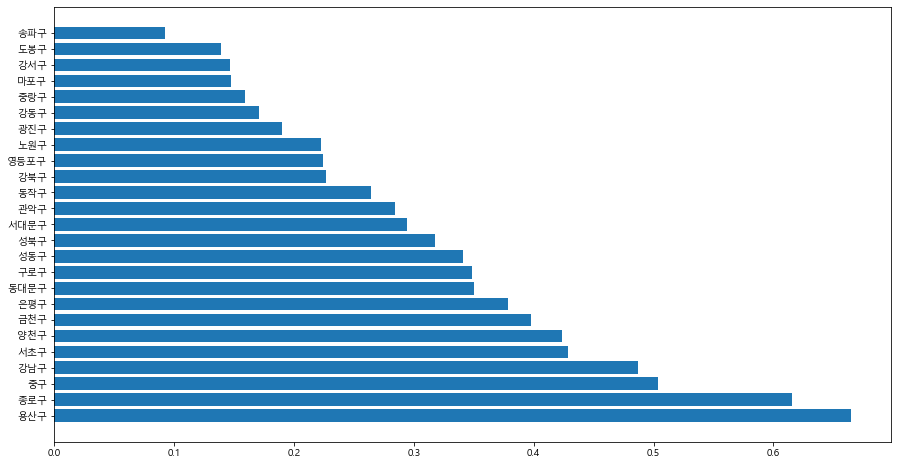

In [60]:
plt.figure(figsize = (15,8))
plt.barh(data_merge.index,data_merge['인구대비 CCTV 비율'])
plt.show()

### 인구수 대비 cctv 비율 예측 값 만들기

In [62]:
#머신 러닝 모델 받아오기
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [63]:
#학습하기
linear_model.fit(data_merge[['인구수']],
                data_merge[['소계']])

LinearRegression()

In [64]:
#학습한 값 확인하기
print('값 1 : ',linear_model.coef_)     #기울기
print('값 2 : ',linear_model.intercept_)#절편(y축과만나는점)

값 1 :  [[0.00130916]]
값 2 :  [645.06649658]
